# Ex 2 week 9: CMB AND NEW PHYSICS


In [1]:
import camb
import numpy as np
import scipy
import matplotlib.pyplot as plt

We read the data of the Planck CMB power spectrum

In [12]:
ls, cls, Up_err, Down_err = np.loadtxt('COM_PowerSpect_CMB-TT-full_R3.01.txt',
                            dtype=np.float64, comments='#', unpack=True)

ls = list(ls)
cls = list(cls)
Up_err = list(Up_err)
Down_err = list(Down_err)

In [13]:
pars = camb.CAMBparams()
pars.set_cosmology(H0=67.37, ombh2=0.02233, omch2=0.1197, mnu=0.0540, omk=0, tau=0.06)
pars.InitPower.set_params(As=2e-9, ns=0.965, r=0)
# calculate background results:

data= camb.get_results(pars)
dic = data.get_cmb_unlensed_scalar_array_dict(CMB_unit='muK')

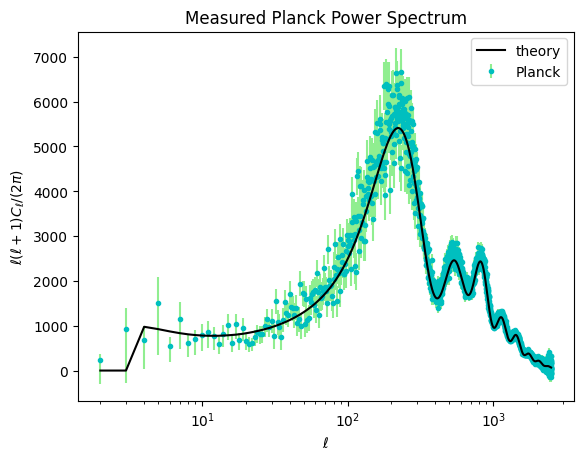

In [14]:
asymmetric_error = [Down_err, Up_err]
plt.errorbar(ls, cls, yerr=asymmetric_error,fmt='.',color='c',ecolor='lightgreen',label='Planck',zorder=-1)
plt.title('Measured Planck Power Spectrum')
plt.xlabel('$\ell$')
plt.ylabel('$\ell(\ell+1)C_\ell/(2\pi)$')
#print(len(ls),len(dic['TxT']))
plt.semilogx(ls[0:len(dic['TxT'])],dic['TxT'],color='k',label='theory')
plt.legend()

## Dark Energy model

We assume the equation of state for DE is $w(a)=w+(1-a)\frac{dw}{da}$

Note that it is possible to cross $w=-1$, which makes CAMB **really* angry if the model is set to *fluid*, because it breaks the weak energy condition and basically violates the conservation of momentum. To allow $w$ to cross $-1$ one needs to set the model to *PPF*, which stands for *parametrized post Friedmannian*. See ArXiv 0808.3125. We just say it is an approximate model of DE built in order to fix the $w=-1$ crossing problem.

In [15]:

dwda=[-1,-0.5,0,1]
tt_results = []
for x in dwda:
  pars = camb.CAMBparams()
  pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122, mnu=0.06, omk=0, tau=0.06)
  pars.InitPower.set_params(As=2e-9, ns=0.965, r=0)
  pars.set_dark_energy(w=-1, wa=x,dark_energy_model='ppf')
  data = camb.get_results(pars)
  dic = data.get_cmb_unlensed_scalar_array_dict(CMB_unit='muK')
  ###PPF parametrized post friedmannian Wayne Hu
  ###ArXiv 0808.3125
  tt_results.append(dic['TxT'])

I apply a mask on the $c_l$s because otherwise they're too many for clearly visualizing the data points

In [16]:
###let's put a mask on the Planck data: they are too many

masked_ls=[]
masked_cls=[]
masked_asymmetric_error = [Down_err[0:10], Up_err[0:10]]

masked_ls[0:10]=ls[0:10]
masked_cls[0:10]=cls[0:10]

for i in range(10,len(ls)):
  if(i%30==0):
    masked_ls.append(ls[i])
    masked_cls.append(cls[i])
    masked_asymmetric_error[0].append(Down_err[i])
    masked_asymmetric_error[1].append(Up_err[i])


In [17]:
print(len(cls), len(tt_results[0]),len(tt_results[1]))

2507 2501 2501


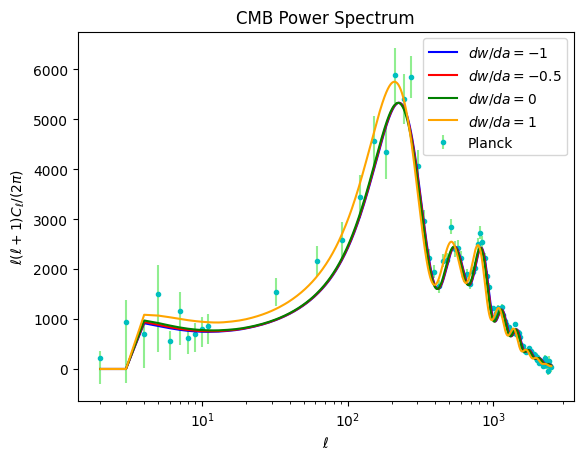

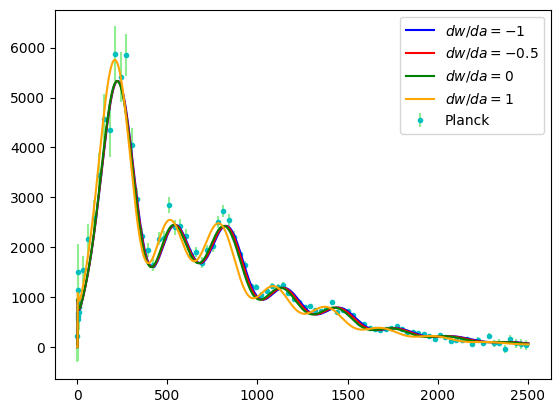

In [18]:
color=['blue','red','green','orange']
###plot with simple errorbars
asymmetric_error = [Down_err, Up_err]
plt.figure()
plt.title('CMB Power Spectrum')
plt.xlabel('$\ell$')
plt.ylabel('$\ell(\ell+1)C_\ell/(2\pi)$')

##planck measured power spectrum
plt.errorbar(masked_ls, masked_cls, yerr=masked_asymmetric_error,fmt='.',color='c',ecolor='lightgreen',label='Planck',zorder=-1)

####theoretical spectrum
for i in range(len(dwda)):
  plt.semilogx(ls[0:len(tt_results[i])],tt_results[i],color[i],label=f'$dw/da={dwda[i]}$')
  plt.legend()

plt.figure()
plt.errorbar(masked_ls, masked_cls, yerr=masked_asymmetric_error,fmt='.',color='c',ecolor='lightgreen',label='Planck',zorder=-1)
for i in range(len(dwda)):
  plt.plot(ls[0:len(tt_results[i])],tt_results[i],color[i],label=f'$dw/da={dwda[i]}$')
  plt.legend()

The difference for different values of the running of w is visible.

At big scales $dw/da$ is not that bad, but it does not oscillate properly ad lower multiples.

Let's plot the residuals in unit of $\sigma_{Planck}$, that is

$(C_l^{Planck}-C_l^{theory})/\sigma_{Planck}$

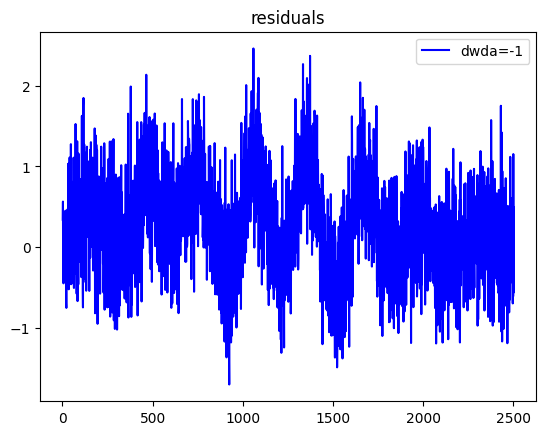

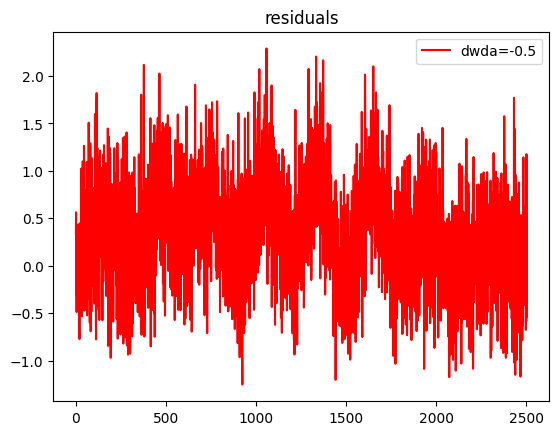

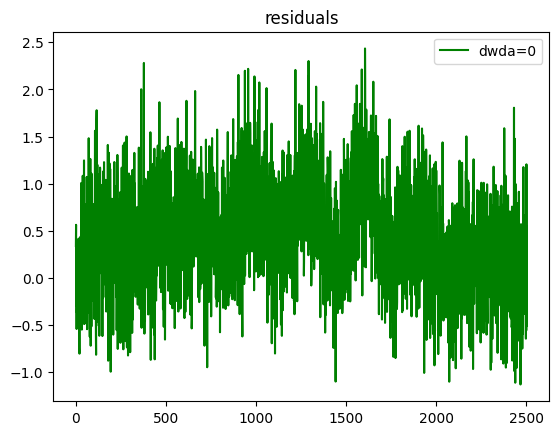

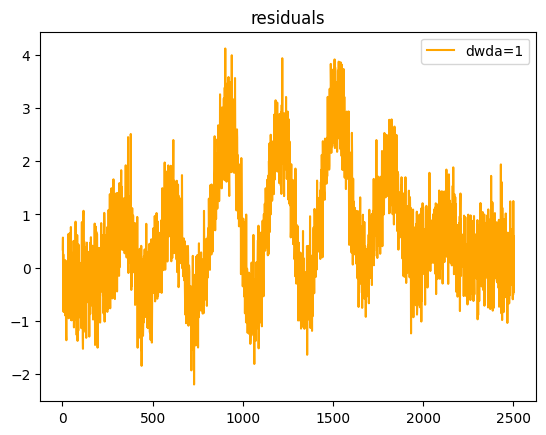

In [19]:
for i in range(len(tt_results)):
  appo=np.array(cls[0:len(tt_results[i])])
  appo_Up_err=np.array(Up_err[0:len(tt_results[i])])
  appo_Down_err=np.array(Down_err[0:len(tt_results[i])])
#  print('len',len(appo))
#  print('err',len(appo_Up_err))
#  print('err',len(appo_Down_err))
  appo_err=appo_Up_err+appo_Down_err
#  print(len(appo_err))
  # chi_square_test_statistic, p_value =scipy.stats.chisquare(appo,tt_results[i])
  # stats.chi2.ppf(1-0.01, df=len(tt_results[i])-1)
  res=(appo-tt_results[i])/appo_err
  plt.figure()
  plt.plot(ls[0:len(tt_results[i])],res,color=color[i],label='dwda='+str(dwda[i]) )
  plt.title('residuals')
  plt.legend()

We see that a negative derivative reduces the residual. That is w<-1 but increasing with a seems better.

$w(a)=w+(1-a)\frac{dw}{da}=-1+\frac{dw}{da}-a\frac{dw}{da}=-1-0.5+0.5a=-1.5+0.5a$